# Demo on frequency modulation principles

This demo is supposed to shed some light on the principles of [frequency modulation (FM)](https://en.wikipedia.org/wiki/Frequency_modulation).

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on communications engineering hold at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

## Import libraries and set defaults

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.style.use('noelle.mplstyle')

## General parameters and functions

Basic parameters like sample rate, tmporal length of the signal, time axis and frequency axis are defined. Further, also a frequently used function is defined.

In [2]:
sr = 1e3 # sample rate
T = 10 # temporal length of signal
t = np.linspace(0, T-1/sr, T * int(sr))
f = np.fft.fftshift(np.fft.fftfreq(np.size(t), 1/sr))

In [3]:
def calc_magnitude_spectrum(x):
    mag_spec = np.abs(np.fft.fftshift(np.fft.fft(x))) / np.size(x)
    return mag_spec
    #freq = np.fft.fftshift(np.fft.fftfreq(np.size(x), 1/sr))
    #plt.plot(freq, mag_spec)

---

## Modulation

### Generation of the information signal

An examplary information signal (also known as [baseband signal](https://en.wikipedia.org/wiki/Baseband) ) is generated. In this case a simple [sinosoidal oscillation](https://en.wikipedia.org/wiki/Sine_wave) is used as information signal. Further, this signal and its corresponding [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) is plotted.

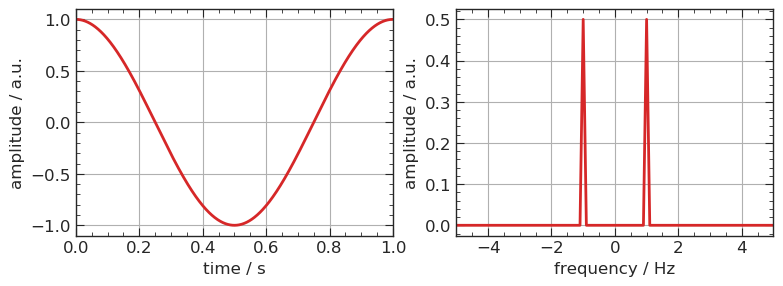

In [4]:
fx = 1 # frequency of information signal
x = np.cos(2 * np.pi * fx * t)

# # rect information signal
# x = (signal.square(2*np.pi/5*t, duty=0.1) + 1.0) / 2
# fx = 10 # approx.

# # # exemplary information signal
# x = x = ((np.sin(2*np.pi*1.5*t) + np.sin(2*np.pi*2.1*t)) * np.exp(-t)) - 0.5
# x = x - np.mean(x)
# fx = 6 # approx.

n = np.size(x)

n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig = plt.figure(figsize=fig_size)

ax = fig.add_subplot(n_row, n_col, 1)
ax.plot(t, x, 'C3');
ax.set_xlim(0,1)
ax.set(xlabel="time / s", ylabel="amplitude / a.u.")

ax = fig.add_subplot(n_row, n_col, 2)
ax.plot(f, calc_magnitude_spectrum(x), color='C3')
ax.set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax.set_xlim(-5, 5);

### Generation of the carrier signal

A [carrier signal](https://en.wikipedia.org/wiki/Carrier_wave) with a specified carrier frequency is generated. Further, this signal and its corresponding [amplitude spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) is plotted.

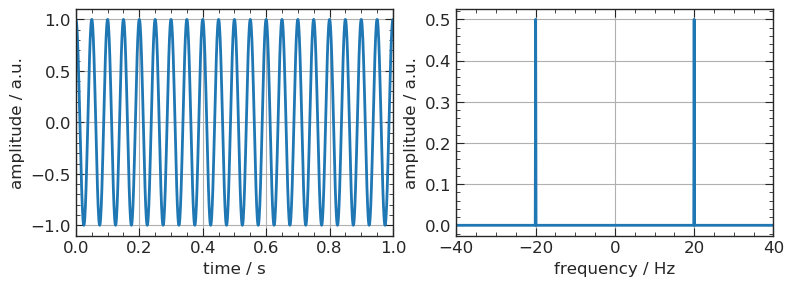

In [5]:
fc = 20

c = np.cos(2 * np.pi * fc * t)

n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig = plt.figure(figsize=fig_size)

ax = fig.add_subplot(n_row, n_col, 1)
ax.plot(t, c)
ax.set_xlim(0,1)
ax.set(xlabel="time / s", ylabel="amplitude / a.u.")

ax = fig.add_subplot(n_row, n_col, 2)
#ax[1].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
ax.plot(f, calc_magnitude_spectrum(c))
ax.set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
ax.set_xlim(-2*fc, 2*fc);

### Actual frequency modulation

The frequency modulated bandpass signal can be described as

$$ x_{FM}(t) = \cos \left( \omega_ct + K_{FM} \int_{0}^{t} x(\tau) d\tau \right) ,$$

where $\omega_c$ is the carrier frequency, $K_{FM}$ a proportional constant and $x(\tau)$ is the information (or baseband) signal. This operation is performed as an interactive demo in the following. In this demo, the [FM modulation index](https://en.wikipedia.org/wiki/Frequency_modulation#Modulation_index) ($\eta$), defined as

$$ \eta=\frac{K_{FM} \cdot \text{max}\{|x(\tau)|\} }{2\pi B} $$

can be varied. Here, $B$ is the bandwidth of the baseband signal. Please note, that the modulation index is only reasonably defined in case of a sinosoidal information signal yet.

As output, the modulated and unmodulated carrier, togethter with the information signal is plotted. Further, also the phase of the modulated and unmodualted carrier on the one hand and the amplitude spectrum of tte modulated bandpass signal on the other is shown.

In [6]:
def frequency_modulation(x=None, c=None, eta=2, fx=None):

    maxx = np.max(np.abs(x))
    delta_omega = eta * 2 * np.pi * fx
    k_fm = delta_omega / maxx
    # eta = delta_omega / 2 / np.pi / fx
    print("FM modulation index: {:1.1f}".format(eta))

    # integration of info signal
    x_int = np.cumsum(x) / np.size(x) * T

    # modulation
    x_fm_bp = np.cos(2 * np.pi * fc * t + k_fm * x_int)

    n_row = 1
    n_col = 3
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig = plt.figure(figsize=fig_size)

    ax = fig.add_subplot(n_row, n_col, 1)
    ax.plot(t, x_fm_bp, 'C1', t, x, 'r', t, c, 'C0');
    ax.set_xlim(0,1)
    ax.set(xlabel="time / s", ylabel="amplitude / a.u.")
    ax.legend(('modulated signal', 'information signal', 'carrier signal'))
    
    ax = fig.add_subplot(n_row, n_col, 2)
    ax.plot(t, 2 * np.pi * fc * t, 'r', t, 2 * np.pi * fc * t + k_fm * x_int, 'C0');
    ax.set_xlim(0,1)
    ax.set_ylim(0,np.abs(2 * np.pi * fc * 1 + k_fm * x_int[t==1]))
    
    ax.set(xlabel="time / s", ylabel="phase / rad")
    ax.legend(('unmodulated phase', 'modulated phase'))
    
    ax = fig.add_subplot(n_row, n_col, 3)
    #ax[2].magnitude_spectrum(x, sides="twosided", Fs=sr, scale="linear", color='r'); # scale="dB" or "linear"
    ax.plot(f, calc_magnitude_spectrum(x_fm_bp))
    ax.set(xlabel="frequency / Hz", ylabel="amplitude / a.u.")
    ax.set_xlim(-2*fc, 2*fc);
    
plot = widgets.interactive(frequency_modulation,
                 eta=widgets.FloatSlider(min=0, max=10, step=0.2, value=1, description='mod. index:', continuous_update=False),
                 x=widgets.fixed(x),
                 c=widgets.fixed(c),
                 fx=widgets.fixed(fx));
out = plot.children[-1]
out.layout.height = '300px'
display(plot)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='mod. index:', max=10.0, ste…